In [1]:
# Grid Search CV to fine-tune a Decision Tree Classifier
#pip install numpy
#pip install matplotlib
#pip install sklearn
#pip install -U scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
#Visualization
# This function will help in visualization of our dataset.
def plot_dataset(X, y,axes):
    plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha = 0.2)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [3]:
X, y = make_moons(n_samples=10000, noise=0.2, random_state=42)

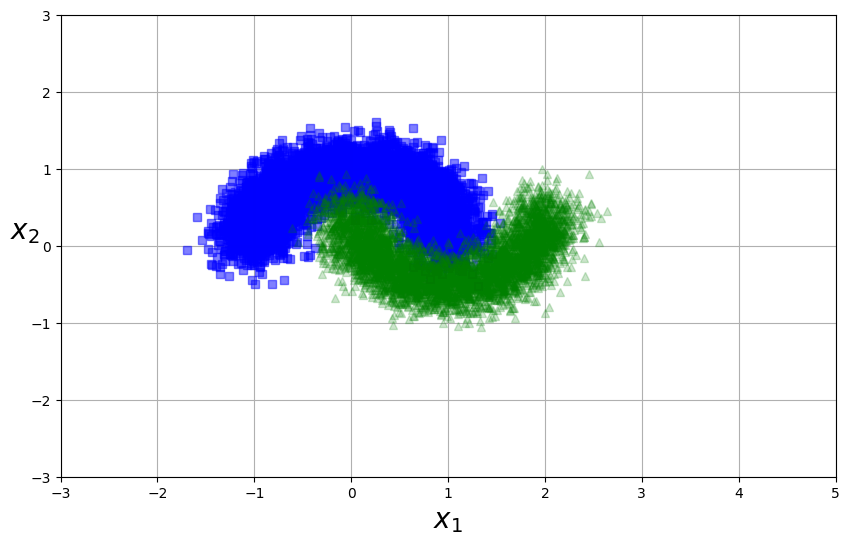

In [4]:
plot_dataset(X, y,[-3, 5, -3, 3])

In [5]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [6]:
tree_clf = DecisionTreeClassifier()

In [7]:
parameter = {
'criterion' : ["gini", "entropy"],
'max_leaf_nodes': list(range(2, 51)),
'min_samples_split': [2, 3, 4]
}

In [8]:
clf = GridSearchCV(tree_clf, parameter,cv = 5,scoring="accuracy",return_train_score=True,n_jobs=-1)

In [9]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [10]:
# Getting the best parameter:
clf.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 27, 'min_samples_split': 2}

In [11]:
#look at the training results:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(mean_score, params)

0.8275937499999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.8275937499999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.8275937499999999 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8790312499999999 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8790312499999999 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8790312499999999 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.91196875 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 4}
0.91196875 {'cri

In [12]:
#Getting the training score
clf.score(X_train, y_train)

0.974875

In [13]:
pred = clf.predict(X_train) 
cm = confusion_matrix(y_train,pred)
pre = precision_score(y_train, pred)
re = recall_score(y_train, pred)
f1 = f1_score(y_train, pred)
acc = accuracy_score(y_train, pred)

In [14]:
#Getting the testing score
clf.score(X_test, y_test)

0.975

In [15]:
print(f" Parameters:{clf.best_params_}")
print(f"Accuracy: {acc}")
print(f" Confusion Matrix:")
print(cm)
print(f"Precision: {pre}")
print(f"Recall:{re}")
print(f"F1 Score: {f1}")

 Parameters:{'criterion': 'entropy', 'max_leaf_nodes': 27, 'min_samples_split': 2}
Accuracy: 0.974875
 Confusion Matrix:
[[3862  125]
 [  76 3937]]
Precision: 0.9692269817823732
Recall:0.9810615499626215
F1 Score: 0.975108359133127
